In [42]:
# Load the libraries
library(tidyverse)
#install.packages('glmnet')
library(glmnet)

# Read in the data



In [67]:
# Read in the data using read.csv

heart_df = read.csv('../data/raw//heart_attack_south_africa.csv')
head(heart_df) # head, top 6 rows

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
2,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
3,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
4,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
5,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0
6,6,27,Female,228,136,100,No,Low,Active,28.7,No,No,Average,Medium,No,Yes,130,145,26,0


In [44]:
# Split the data into two datasets based on 55 years (less than 55, greater than or equal to 55)

heart_df_55 = heart_df %>%
filter(Age < 55)

nrow(heart_df_55)

heart_dfgt55 = heart_df %>%
filter(Age >=55)
nrow(heart_dfgt55)


[1] 46485

[1] 53515

# Younger participants below 55 years of age

In [45]:
# Younger pop
head(heart_df_55)
set.seed(1)
# Split the data into train and test
# Use 70% of dataset as training set and 30% as test set
sam <- sample(c(TRUE, FALSE), nrow(heart_df_55), replace=TRUE, prob=c(0.7,0.3))
train  <- heart_df_55[sam, ]
test   <- heart_df_55[!sam, ]

nrow(train) #32591
# nrow(test) #14054
32591/46485

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
3,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0
4,6,27,Female,228,136,100,No,Low,Active,28.7,No,No,Average,Medium,No,Yes,130,145,26,0
5,7,46,Male,278,171,76,No,Moderate,Sedentary,22.5,No,No,Average,High,Yes,No,257,156,45,0
6,9,26,Male,166,100,62,Yes,High,Sedentary,25.8,No,No,Poor,Medium,No,No,226,103,54,0


[1] 32548

[1] 0.7011079

In [37]:
# Prediction 
# Build the model using the training dataset and try predict the test dataset
# Response variable
Y = train$Heart_Attack_Outcome
# Define, Predictor variables
X= data.matrix(train[, !names(train) %in% c('Heart_Attack_Outcome', 'Patient_ID')])


Call:  glmnet(x = X, y = Y, alpha = 1) 

   Df  %Dev   Lambda
1   0  0.00 0.175800
2   4  3.10 0.160200
3   5 10.27 0.146000
4   5 17.62 0.133000
5   5 23.73 0.121200
6   5 28.79 0.110400
7   5 33.00 0.100600
8   5 36.49 0.091690
9   5 39.39 0.083540
10  5 41.80 0.076120
11  6 43.97 0.069360
12  7 46.29 0.063200
13  7 48.23 0.057580
14  7 49.85 0.052470
15  7 51.19 0.047810
16  7 52.30 0.043560
17  7 53.22 0.039690
18  7 53.99 0.036160
19  7 54.62 0.032950
20  7 55.15 0.030020
21  7 55.59 0.027360
22  7 55.96 0.024930
23  7 56.26 0.022710
24  7 56.51 0.020690
25  7 56.72 0.018860
26  7 56.89 0.017180
27  7 57.03 0.015650
28  7 57.15 0.014260
29  7 57.25 0.013000
30  7 57.34 0.011840
31  7 57.40 0.010790
32  7 57.46 0.009831
33  7 57.51 0.008958
34  7 57.55 0.008162
35  7 57.58 0.007437
36  7 57.61 0.006776
37  7 57.63 0.006174
38  7 57.65 0.005626
39  7 57.66 0.005126
40  7 57.67 0.004671
41  7 57.69 0.004256
42  7 57.69 0.003878
43  7 57.70 0.003533
44  8 57.71 0.003219
45  8 57.71 0

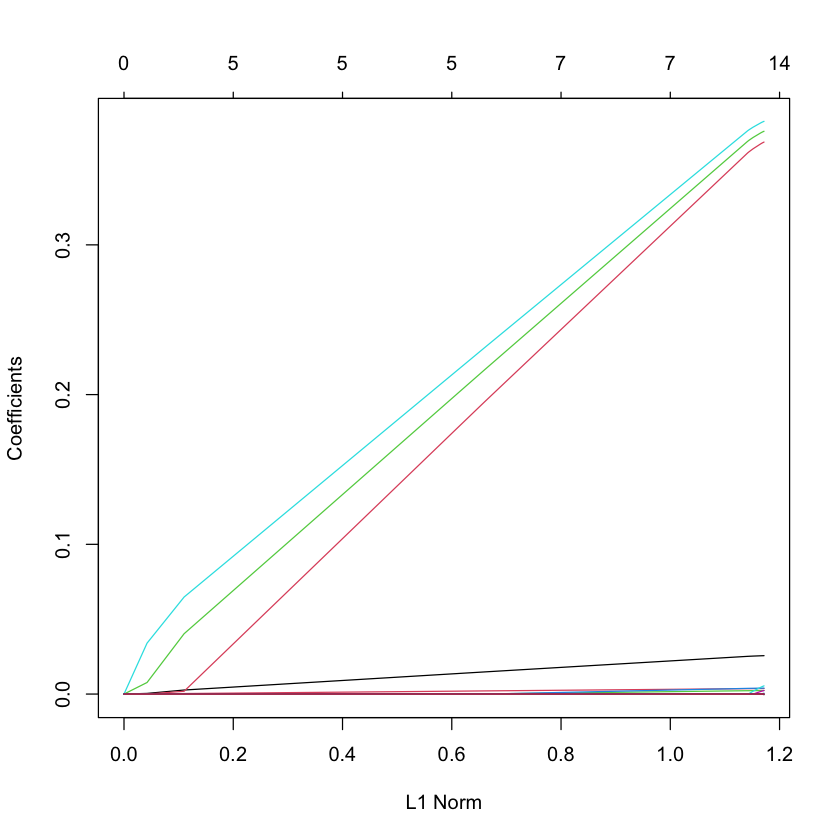

In [38]:
set.seed(1)
# Base  model
lasso_model = glmnet(X, Y, alpha = 1)
lasso_model
plot(lasso_model)

As lambda increases , some coefficients shrink to zero - useful in feature selection.


Call:  cv.glmnet(x = X, y = Y, alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index Measure        SE Nonzero
min 0.000727    60  0.1039 0.0006316      14
1se 0.008958    33  0.1045 0.0006293       7

[1] 0.0007266018

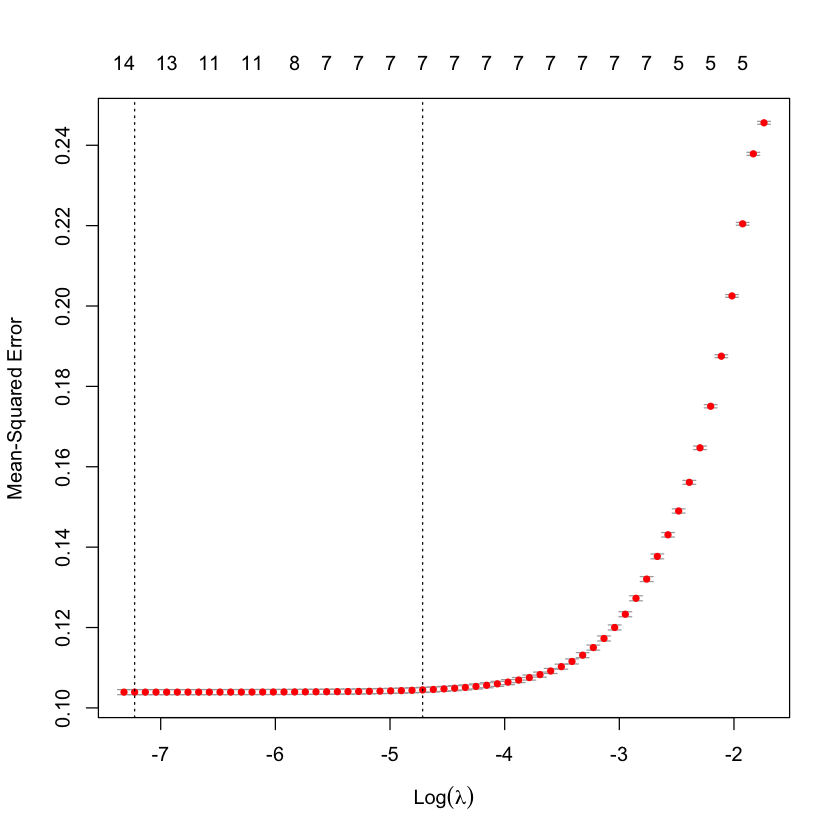

In [39]:
# Fit the LASSO regression model

# perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(X, Y, alpha = 1)
cv_model
# # find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda

# # produce plot of test MSE by lambda value
plot(cv_model) 

In [40]:
 # Best performing model
best_model = glmnet(X, Y, alpha = 1, lambda = best_lambda)
coefficients(best_model)

19 x 1 sparse Matrix of class "dgCMatrix"
                                        s0
(Intercept)                  -3.248223e+00
Age                           .           
Gender                       -2.781093e-04
Cholesterol_Level             3.671422e-03
Blood_Pressure_Systolic       2.332010e-03
Blood_Pressure_Diastolic      3.963347e-03
Smoking_Status                3.823556e-01
Alcohol_Intake                2.279521e-03
Physical_Activity             .           
Obesity_Index                 2.562472e-02
Diabetes_Status               3.684758e-01
Family_History_Heart_Disease  3.757152e-01
Diet_Quality                  .           
Stress_Level                  4.723004e-04
Heart_Attack_History          .           
Medication_Usage              5.339256e-03
Triglycerides_Level          -2.674683e-05
LDL_Level                     4.402753e-05
HDL_Level                     3.581001e-05

In [51]:
# Use the Best Lasso model to predict the older dataset

head(heart_dfgt55)

# Drop the outcome 
heart_dfgt55_topredict= data.matrix(heart_dfgt55[, !names(heart_dfgt55) %in% c('Heart_Attack_Outcome', 'Patient_ID')])
head(heart_dfgt55_topredict)

# Use LASSO regression model to predict response value
heart_dfgt55_predicted = predict(best_model, s = best_lambda, newx= heart_dfgt55_topredict)
heart_dfgt55_predicted

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,8,77,Male,272,145,112,No,Low,Active,28.2,Yes,No,Average,Medium,No,No,221,99,44,1
4,11,62,Female,253,179,61,No,Low,Sedentary,26.4,No,No,Average,High,No,Yes,263,142,28,1
5,13,88,Female,207,95,66,No,Low,Sedentary,33.2,No,No,Good,Medium,No,Yes,162,102,68,0
6,14,84,Female,197,138,89,Yes,High,Sedentary,35.9,No,Yes,Poor,Medium,Yes,Yes,116,170,46,1


Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level
76,1,156,94,79,1,1,3,35.2,1,1,2,1,1,1,264,141,65
85,2,254,173,113,2,3,2,32.0,2,1,2,2,1,1,220,124,70
77,2,272,145,112,1,2,1,28.2,2,1,1,3,1,1,221,99,44
62,1,253,179,61,1,2,3,26.4,1,1,1,1,1,2,263,142,28
88,1,207,95,66,1,2,3,33.2,1,1,2,3,1,2,162,102,68
84,1,197,138,89,2,1,3,35.9,1,2,3,3,2,2,116,170,46


s1
-0.10534324
1.24763164
0.76086236
0.15853227
-0.00885976
0.97427380
-0.27502657
-0.24763709
0.82248766
0.18457059


0
1
1
1
0
1


Actual,s1
<int>,<dbl>
0,-0.10534324
1,1.24763164
1,0.76086236
1,0.15853227
0,-0.00885976
1,0.97427380
0,-0.27502657
0,-0.24763709
1,0.82248766


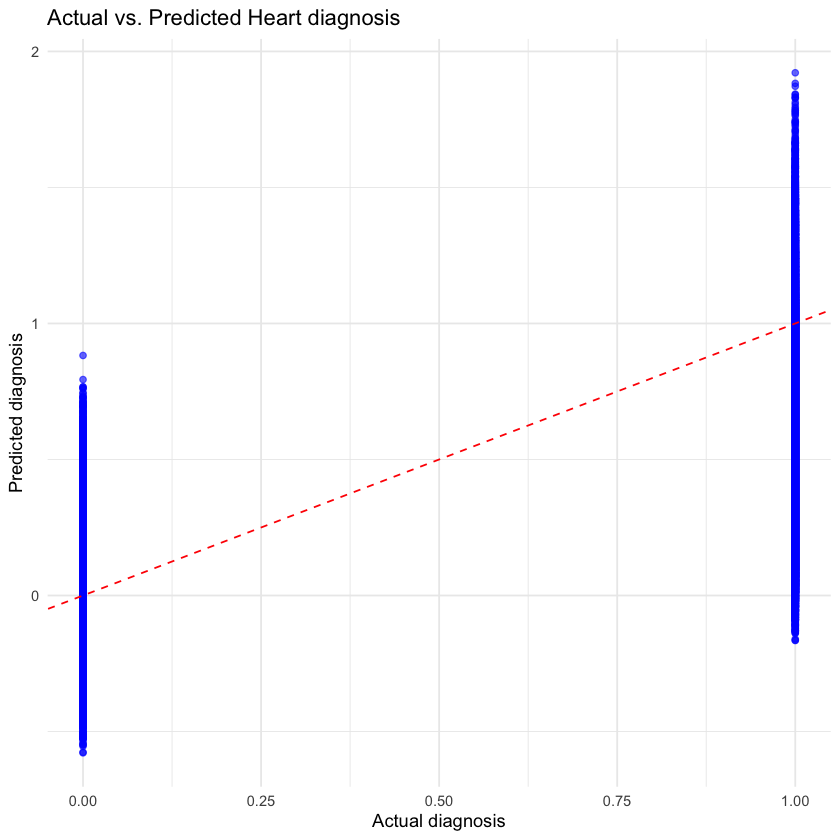

In [57]:

library(ggplot2)  # For visualization

y = data.matrix(heart_dfgt55[, names(heart_dfgt55) %in% c('Heart_Attack_Outcome')])
head(y)

# Convert predictions to a dataframe
predicted_values <- data.frame(
  Actual = y,
  Predicted = predict(best_model, s = best_lambda, newx = heart_dfgt55_topredict)
)

predicted_values

# Scatter plot
ggplot(predicted_values, aes(x = Actual, y = s1)) +
  geom_point(color = "blue", alpha = 0.6) +  # Blue dots
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +  # Ideal line
  labs(title = "Actual vs. Predicted Heart diagnosis",
       x = "Actual diagnosis",
       y = "Predicted diagnosis") +
  theme_minimal()

In [70]:
head(heart_df_55)

# Create a new column of SBP,as a function of DBP
set.seed(123)
noise <- rnorm(n=100000, mean = 0, sd = 10) # Random noise
heart_df$new_SBP <- 0.8 * heart_df$Blood_Pressure_Diastolic + noise # SBP depends on DBP + noise

cor(heart_df$new_SBP,heart_df$Blood_Pressure_Diastolic)

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
3,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0
4,6,27,Female,228,136,100,No,Low,Active,28.7,No,No,Average,Medium,No,Yes,130,145,26,0
5,7,46,Male,278,171,76,No,Moderate,Sedentary,22.5,No,No,Average,High,Yes,No,257,156,45,0
6,9,26,Male,166,100,62,Yes,High,Sedentary,25.8,No,No,Poor,Medium,No,No,226,103,54,0


[1] 0.8087988

In [69]:
cor(heart_df$Blood_Pressure_Systolic,heart_df$Blood_Pressure_Diastolic)

[1] -0.001568419

In [71]:
# Split the data into two datasets based on 55 years (less than 55, greater than or equal to 55)

heart_df_55 = heart_df %>%
filter(Age < 55)

nrow(heart_df_55)

heart_dfgt55 = heart_df %>%
filter(Age >=55)
nrow(heart_dfgt55)

[1] 46485

[1] 53515

In [72]:
# Younger pop
head(heart_df_55)
set.seed(1)
# Split the data into train and test
# Use 70% of dataset as training set and 30% as test set
sam <- sample(c(TRUE, FALSE), nrow(heart_df_55), replace=TRUE, prob=c(0.7,0.3))
train  <- heart_df_55[sam, ]
test   <- heart_df_55[!sam, ]

nrow(train) #32591
# nrow(test) #14054
32591/46485

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,⋯,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome,new_SBP
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,⋯,No,Average,Medium,No,Yes,150,81,42,0,68.09823
2,4,45,Female,261,187,65,No,High,Sedentary,36.4,⋯,Yes,Average,Low,No,Yes,141,56,38,1,52.70508
3,5,48,Male,206,189,84,No,Low,Active,26.6,⋯,No,Good,High,No,No,221,186,26,0,68.49288
4,6,27,Female,228,136,100,No,Low,Active,28.7,⋯,No,Average,Medium,No,Yes,130,145,26,0,97.15065
5,7,46,Male,278,171,76,No,Moderate,Sedentary,22.5,⋯,No,Average,High,Yes,No,257,156,45,0,65.40916
6,9,26,Male,166,100,62,Yes,High,Sedentary,25.8,⋯,No,Poor,Medium,No,No,226,103,54,0,42.73147


[1] 32548

[1] 0.7011079

In [73]:
# Prediction 
# Build the model using the training dataset and try predict the test dataset
# Response variable
Y = train$Heart_Attack_Outcome
# Define, Predictor variables
X= data.matrix(train[, !names(train) %in% c('Heart_Attack_Outcome', 'Patient_ID')])


Call:  glmnet(x = X, y = Y, alpha = 1) 

   Df  %Dev   Lambda
1   0  0.00 0.175800
2   4  3.10 0.160200
3   5 10.27 0.146000
4   5 17.62 0.133000
5   5 23.73 0.121200
6   5 28.79 0.110400
7   5 33.00 0.100600
8   5 36.49 0.091690
9   5 39.39 0.083540
10  5 41.80 0.076120
11  6 43.97 0.069360
12  7 46.29 0.063200
13  7 48.23 0.057580
14  7 49.85 0.052470
15  7 51.19 0.047810
16  7 52.30 0.043560
17  7 53.22 0.039690
18  7 53.99 0.036160
19  7 54.62 0.032950
20  7 55.15 0.030020
21  7 55.59 0.027360
22  7 55.96 0.024930
23  7 56.26 0.022710
24  7 56.51 0.020690
25  7 56.72 0.018860
26  7 56.89 0.017180
27  7 57.03 0.015650
28  7 57.15 0.014260
29  7 57.25 0.013000
30  7 57.34 0.011840
31  7 57.40 0.010790
32  7 57.46 0.009831
33  7 57.51 0.008958
34  7 57.55 0.008162
35  7 57.58 0.007437
36  7 57.61 0.006776
37  7 57.63 0.006174
38  7 57.65 0.005626
39  7 57.66 0.005126
40  7 57.67 0.004671
41  7 57.69 0.004256
42  7 57.69 0.003878
43  7 57.70 0.003533
44  8 57.71 0.003219
45  8 57.71 0

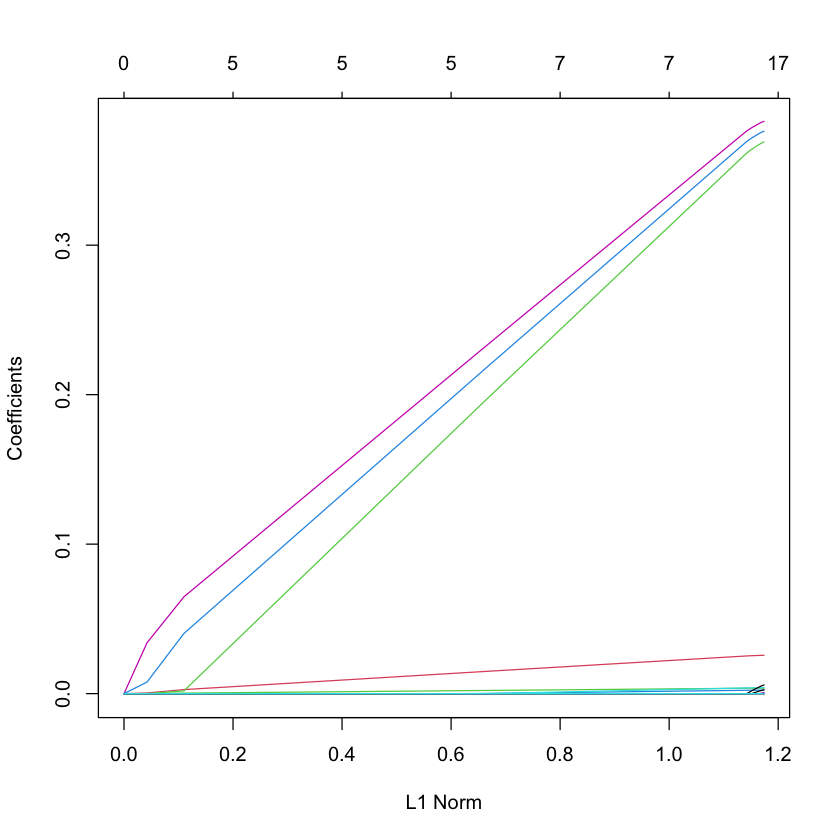

In [74]:
set.seed(1)
# Base  model
lasso_model = glmnet(X, Y, alpha = 1)
lasso_model
plot(lasso_model)


Call:  cv.glmnet(x = X, y = Y, alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index Measure        SE Nonzero
min 0.001157    55  0.1039 0.0006305      12
1se 0.008958    33  0.1045 0.0006293       7

[1] 0.001156956

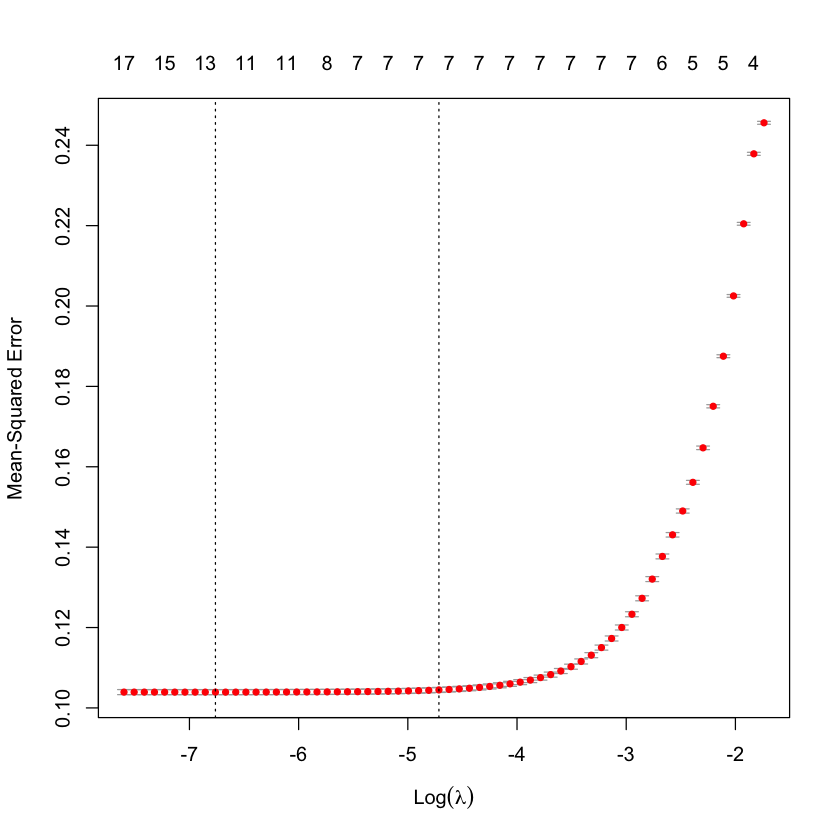

In [75]:
# Fit the LASSO regression model

# perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(X, Y, alpha = 1)
cv_model
# # find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda

# # produce plot of test MSE by lambda value
plot(cv_model) 

In [76]:
# Best performing model
best_model = glmnet(X, Y, alpha = 1, lambda = best_lambda)
coefficients(best_model)

20 x 1 sparse Matrix of class "dgCMatrix"
                                        s0
(Intercept)                  -3.231316e+00
Age                           .           
Gender                        .           
Cholesterol_Level             3.661601e-03
Blood_Pressure_Systolic       2.318006e-03
Blood_Pressure_Diastolic      3.938272e-03
Smoking_Status                3.814051e-01
Alcohol_Intake                1.703587e-03
Physical_Activity             .           
Obesity_Index                 2.555805e-02
Diabetes_Status               3.673889e-01
Family_History_Heart_Disease  3.747141e-01
Diet_Quality                  .           
Stress_Level                  .           
Heart_Attack_History          .           
Medication_Usage              4.468025e-03
Triglycerides_Level          -2.093235e-05
LDL_Level                     3.426283e-05
HDL_Level                     1.026491e-05
new_SBP                       .           

In [77]:
# Use the Best Lasso model to predict the older dataset

head(heart_dfgt55)

# Drop the outcome 
heart_dfgt55_topredict= data.matrix(heart_dfgt55[, !names(heart_dfgt55) %in% c('Heart_Attack_Outcome', 'Patient_ID')])
head(heart_dfgt55_topredict)

# Use LASSO regression model to predict response value
heart_dfgt55_predicted = predict(best_model, s = best_lambda, newx= heart_dfgt55_topredict)
heart_dfgt55_predicted

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,⋯,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome,new_SBP
,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1,76,Female,156,94,79,No,High,Sedentary,35.2,⋯,No,Good,High,No,No,264,141,65,0,57.59524
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,⋯,No,Good,Low,No,No,220,124,70,1,105.98708
3,8,77,Male,272,145,112,No,Low,Active,28.2,⋯,No,Average,Medium,No,No,221,99,44,1,76.94939
4,11,62,Female,253,179,61,No,Low,Sedentary,26.4,⋯,No,Average,High,No,Yes,263,142,28,1,61.04082
5,13,88,Female,207,95,66,No,Low,Sedentary,33.2,⋯,No,Good,Medium,No,Yes,162,102,68,0,56.80771
6,14,84,Female,197,138,89,Yes,High,Sedentary,35.9,⋯,Yes,Poor,Medium,Yes,Yes,116,170,46,1,72.30683


Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,new_SBP
76,1,156,94,79,1,1,3,35.2,1,1,2,1,1,1,264,141,65,57.59524
85,2,254,173,113,2,3,2,32.0,2,1,2,2,1,1,220,124,70,105.98708
77,2,272,145,112,1,2,1,28.2,2,1,1,3,1,1,221,99,44,76.94939
62,1,253,179,61,1,2,3,26.4,1,1,1,1,1,2,263,142,28,61.04082
88,1,207,95,66,1,2,3,33.2,1,1,2,3,1,2,162,102,68,56.80771
84,1,197,138,89,2,1,3,35.9,1,2,3,3,2,2,116,170,46,72.30683


s1
-0.101795248
1.244870616
0.760563319
0.160457818
-0.008047979
0.972079832
-0.272618338
-0.243669014
0.821544611
0.184512080


0
1
1
1
0
1


Actual,s1
<int>,<dbl>
0,-0.101795248
1,1.244870616
1,0.760563319
1,0.160457818
0,-0.008047979
1,0.972079832
0,-0.272618338
0,-0.243669014
1,0.821544611


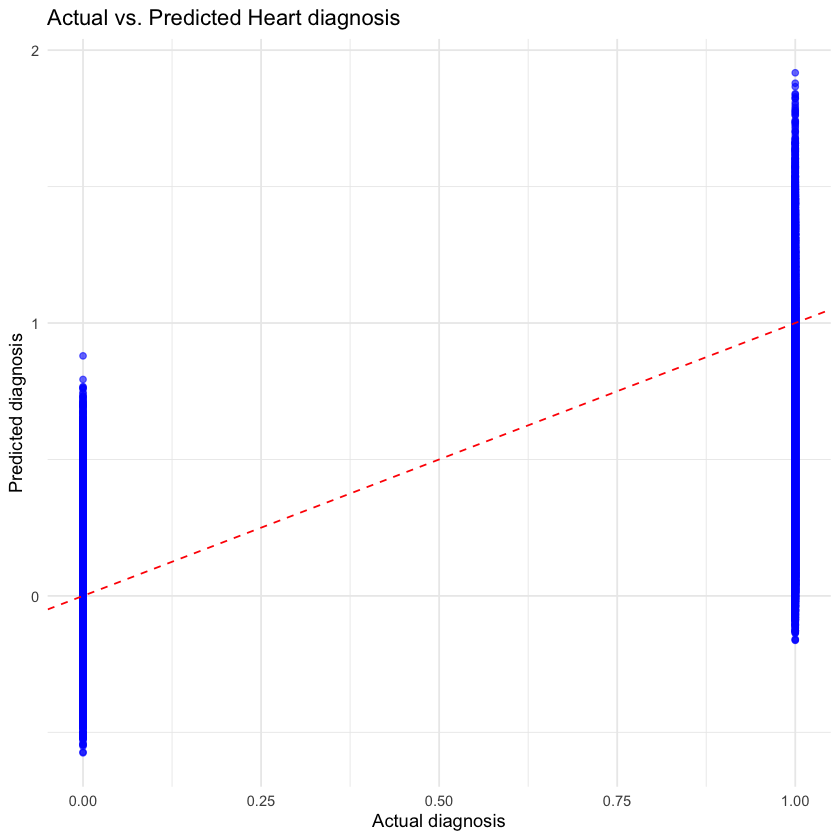

In [78]:
library(ggplot2)  # For visualization

y = data.matrix(heart_dfgt55[, names(heart_dfgt55) %in% c('Heart_Attack_Outcome')])
head(y)

# Convert predictions to a dataframe
predicted_values <- data.frame(
  Actual = y,
  Predicted = predict(best_model, s = best_lambda, newx = heart_dfgt55_topredict)
)

predicted_values

# Scatter plot
ggplot(predicted_values, aes(x = Actual, y = s1)) +
  geom_point(color = "blue", alpha = 0.6) +  # Blue dots
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +  # Ideal line
  labs(title = "Actual vs. Predicted Heart diagnosis",
       x = "Actual diagnosis",
       y = "Predicted diagnosis") +
  theme_minimal()